In [1]:
from elasticsearch import Elasticsearch, helpers
from security import mykey as my
import matplotlib.image as img 
import matplotlib.pyplot as plt 
import pprint as pp
import os

## ES 연동

In [2]:
es_name = "elastic"
es_pwd = my.getKey(os.path.join("security","key.properties"))

es = Elasticsearch( 
    http_auth=('elastic', es_pwd[es_name])
)

## 쿼리 함수
- 쿼리 스트링 사용
- OR 연산

In [124]:
def who(index, description):
    # split description
    # 쿼리 스트링에 필요한 형태로 변경
    _description = description.split(",")
    _description = [ "\\\"" + d + "\\\"" for d in _description]
    des = ""
    for d in _description:
        des += (d + " OR ")
    description = des[:-3]
    
#     쿼리 바디 작성

#     #match query
#     query = {
#             "match": {
#                 "description": {
#                     "query": "",
#                     "analyzer": "snowball",
# #                     "operator": "and"
#                 }
#             }
#         }
#     query["match"]["description"]["query"] = description

    size = 3    
    query = {
            "query_string": {
                "default_field": "description",
                "query": "",
                "phrase_slop": 1,
                "analyzer": "snowball"
            }
        }
    query["query_string"]["query"] = description
    _source = ["char_name", "wbt_name", "description", "char_img", "wbt_img"]

    result = es.search(index = index, size = size, query = query, _source = _source)

    return [a for a in result["hits"]["hits"]]

In [125]:
def divide(info):
    _score = info["_score"]
    _source = info["_source"]
    
    char_name = _source["char_name"]
    wbt_name = _source["wbt_name"]
    char_img = _source["char_img"]
    wbt_img = _source["wbt_img"]
    des = _source["description"]
    
    return [_score, char_name, char_img, wbt_name, wbt_img, des]

In [126]:
def showResults(result):
    print("Recommended Character's Relevance Score ::", result[0])
    print("Character Name ::", result[1])
    print("Webtoon Name ::", result[3])
    print(result[5])
    c_img = result[2]
    fileName = os.path.join("images", "c", c_img) 
    ndarray = img.imread(fileName) 
    plt.imshow(ndarray) 
    plt.show()

In [127]:
def letGo(index, description):
    results = who(index, description)
    if len(results) != 0:
        for r in results: showResults(divide(r))
    else:
        print("No Result")

In [131]:
def goGo():
    descrition = ""
    print("Insert \"q\" to STOP")
    print("OR Insert Descriptions")
    while descrition != "q":
        print("type your description separated by \",\"")
        descrition = input()
        os.system("clear")
        letGo("day_toon_test_4", descrition)
        print("*"*50)

Insert "q" to STOP
OR Insert Descriptions
type your description separated by ","
red
Recommended Character's Relevance Score :: 2.7891202
Character Name :: Kamado Tanjiro
Webtoon Name :: Kimetsu no Yaiba
human man dark-red hair red eyes red scar earring checkered coat kind friendly


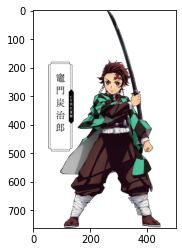

Recommended Character's Relevance Score :: 2.6662836
Character Name :: Hwaryun
Webtoon Name :: tower of god
witch woman red and long culry hair red eyes white skin eyepatch expressionless rational chic cool beauty 


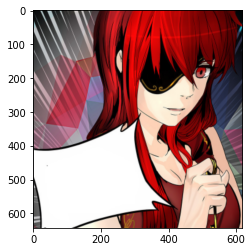

Recommended Character's Relevance Score :: 2.0896254
Character Name :: Dana
Webtoon Name :: leeyoungsil
human woman black short hair red eye apricot skin oval faced slim jaw line 


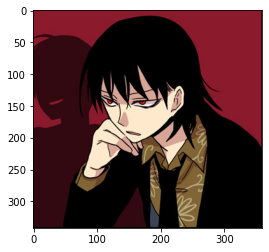

**************************************************
type your description separated by ","
blue
Recommended Character's Relevance Score :: 3.0686986
Character Name :: Osu
Webtoon Name :: leeyoungsil
human man sky blue hair sky blue eye thin eyebrow blue suit short height 


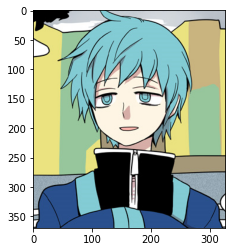

Recommended Character's Relevance Score :: 2.0896254
Character Name :: Vegeta
Webtoon Name :: dragon ball
human man blonde pouty hair blue eyes white skin muscular tattoo battle maniac conceit


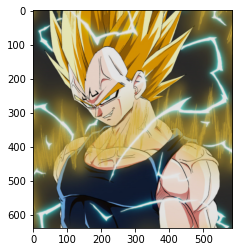

Recommended Character's Relevance Score :: 2.0896254
Character Name :: Uzumaki Naruto
Webtoon Name :: naruto
human man blonde short hair blue eyes peach skin sharp impression cat face hairband 


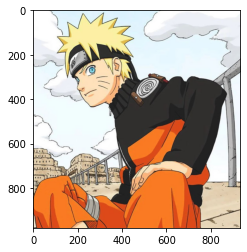

**************************************************
type your description separated by ","
q
No Result
**************************************************


In [132]:
goGo()

In [ ]:
person who wear a hat
person who wear a hat and has bright hair

In [ ]:
who has yellow hair and navy color eye
his hair is blonde and has blue eye